In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import ray
from ray.rllib.agents import ppo, a3c, dqn, sac

from mdps.whited_cash import cMDPWhited_cash
from utils.distributions import ConstantDistribution, ParticleDistribution, UniformDistribution

In [2]:
# collect expert rollout

def get_rollouts(solver_, config):
    """Generate rollouts from a given solver and MDP(c)"""
    env_ = cMDPWhited_cash(config=config)
    done_ = False
    obs_ = env_.reset()
    # run until episode ends
    gt_obs_arr_ = obs_
    gt_act_arr_ = None
    gt_rew_arr_ = None
    while not done_:
        action_ = solver_.compute_single_action(obs_)
        obs_, rewawrd_, done_, _ = env_.step(action_)
        gt_obs_arr_ = np.vstack((gt_obs_arr_, obs_))
        if gt_act_arr_ is None:
            gt_act_arr_ = action_
            gt_rew_arr_ = [rewawrd_]
        else:
            gt_act_arr_ = np.vstack((gt_act_arr_, action_))
            gt_rew_arr_ += [rewawrd_]

    gt_rew_arr_ = np.array(gt_rew_arr_)
    return gt_obs_arr_[1:,:], gt_act_arr_, gt_rew_arr_

def plot_rollouts(gt_obs_arr_, gt_act_arr_):
    """Plot generated rollouts"""
    fig_, ax_1 = plt.subplots()
    fig_.set_size_inches(10, 6, forward=True)

    x = np.arange(start=0, stop=gt_obs_arr_.shape[0])
    ax_2 = ax_1.twinx()
    ax_1.plot(x, gt_obs_arr_[:,0], 'r-')
    ax_2.plot(x, gt_act_arr_[:,0], 'b-', alpha=0.3)

    ax_1.set_xlabel('time step')
    ax_1.set_ylabel('Capital(k)', color='r')
    ax_2.set_ylabel('Action(I)', color='b')
    plt.title('sample observations and actions')
    plt.show()

    fig_, ax_3 = plt.subplots()
    fig_.set_size_inches(10, 6, forward=True)

    x = np.arange(start=0, stop=gt_obs_arr_.shape[0])
    ax_4 = ax_3.twinx()
    ax_3.plot(x, gt_obs_arr_[:,0], 'r-')
    ax_4.plot(x, gt_act_arr_[:,1], 'b-', alpha=0.3)

    ax_3.set_xlabel('time step')
    ax_3.set_ylabel('Capital(k)', color='r')
    ax_4.set_ylabel('Action(J)', color='b')
    plt.title('sample observations and actions')
    plt.show()

In [3]:
c = {"context_distribution":
        ConstantDistribution(dim=7, constant_vector=np.array([0.98, 0.15, 0.7, 0.7, 0.15, 0.0, 0.07]))
    }

### 1. ppo

In [43]:
ray.shutdown()
ray.init()

expert = ppo.PPOTrainer(env=cMDPWhited_cash, config={
    "env_config": c,
    "framework": "torch",  # config to pass to env class
})

rews = []
for eps in range(35):
    res = expert.train()
    if eps % 5 == 0:
        print(eps, res['episode_reward_mean'])
    rews += [res['episode_reward_mean']]

2022-04-10 14:41:05,820	WARNING util.py:57 -- Install gputil for GPU system monitoring.
C:\Users\ZhenghaoJiang\anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
2022-04-10 14:41:16,219	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 1.4029111115444318e+17x the scale of `vf_clip_param`. This means that it will take more than 1.4029111115444318e+17 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.


0 -1.4029111115444319e+18


C:\Users\ZhenghaoJiang\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
2022-04-10 14:41:26,918	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 2.3855169533793162e+17x the scale of `vf_clip_param`. This means that it will take more than 2.3855169533793162e+17 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-10 14:41:37,394	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 5.1675807885261875e+17x the scale of `vf_clip_param`. This means that it will take more than 5.1675807885261875e+17 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-10 14:41:47,641	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 4.805916402184655e+17x the scale of `vf_clip_param`. This means that it will take m

5 -2.067777055285082e+18


2022-04-10 14:42:18,046	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 1.3037697411084949e+17x the scale of `vf_clip_param`. This means that it will take more than 1.3037697411084949e+17 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-10 14:42:28,392	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 1.502340815415399e+17x the scale of `vf_clip_param`. This means that it will take more than 1.502340815415399e+17 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-10 14:42:39,757	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 1.9606295252155424e+17x the scale of `vf_clip_param`. This means that it will take more than 1.9606295252155424e+17 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-10 14:42:5

10 -1.188061055000523e+18


2022-04-10 14:43:13,611	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 1.2342521051567907e+17x the scale of `vf_clip_param`. This means that it will take more than 1.2342521051567907e+17 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-10 14:43:24,921	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 1.1277043381383648e+17x the scale of `vf_clip_param`. This means that it will take more than 1.1277043381383648e+17 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-10 14:43:36,121	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 2.0494642830668154e+17x the scale of `vf_clip_param`. This means that it will take more than 2.0494642830668154e+17 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-10 14:43

15 -3.70178957927747e+18


2022-04-10 14:44:09,460	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 4.4218031463682586e+17x the scale of `vf_clip_param`. This means that it will take more than 4.4218031463682586e+17 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-10 14:44:20,145	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 3.8638126834201165e+17x the scale of `vf_clip_param`. This means that it will take more than 3.8638126834201165e+17 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-10 14:44:30,405	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 2.7318732024550458e+17x the scale of `vf_clip_param`. This means that it will take more than 2.7318732024550458e+17 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-10 14:44

20 -1.42955407673974e+18


2022-04-10 14:45:02,305	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 1.8935596927780406e+17x the scale of `vf_clip_param`. This means that it will take more than 1.8935596927780406e+17 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-10 14:45:13,422	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 1.6224144147982256e+17x the scale of `vf_clip_param`. This means that it will take more than 1.6224144147982256e+17 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-10 14:45:24,215	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 1.589678781766221e+17x the scale of `vf_clip_param`. This means that it will take more than 1.589678781766221e+17 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-10 14:45:3

25 -1.6765500264937275e+18


2022-04-10 14:45:57,429	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 1.0998692456806736e+17x the scale of `vf_clip_param`. This means that it will take more than 1.0998692456806736e+17 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-10 14:46:08,308	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 1.1658316366806669e+17x the scale of `vf_clip_param`. This means that it will take more than 1.1658316366806669e+17 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-10 14:46:19,483	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 1.6441372669855712e+17x the scale of `vf_clip_param`. This means that it will take more than 1.6441372669855712e+17 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-10 14:46

30 -2.8405666310173087e+18


2022-04-10 14:46:51,772	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 3.358564559670562e+17x the scale of `vf_clip_param`. This means that it will take more than 3.358564559670562e+17 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-10 14:47:02,482	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 1.9936893947481592e+18x the scale of `vf_clip_param`. This means that it will take more than 1.9936893947481592e+18 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-10 14:47:13,100	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 1.7904378069987773e+18x the scale of `vf_clip_param`. This means that it will take more than 1.7904378069987773e+18 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-10 14:47:2

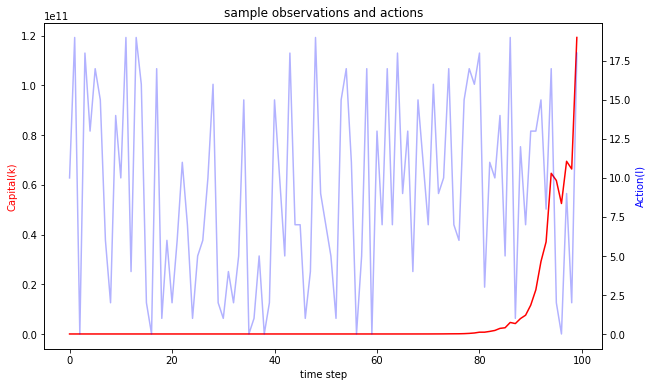

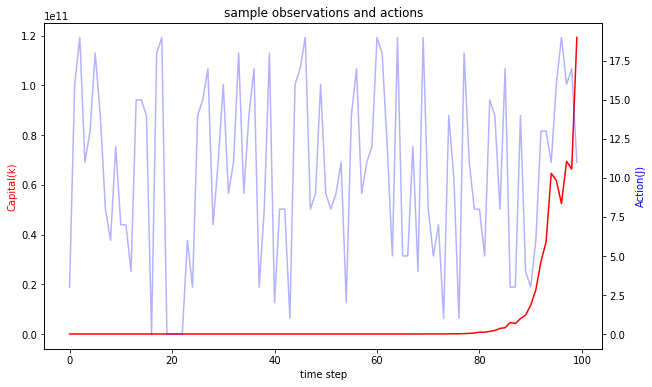

2022-04-10 18:59:16,908	WARNING worker.py:1245 -- The node with node id: d6ed73f1ce01fcbf162674c98d8f893d07b2326538b3b2d91190e09d and ip: 127.0.0.1 has been marked dead because the detector has missed too many heartbeats from it. This can happen when a raylet crashes unexpectedly or has lagging heartbeats.
(pid=None) [2022-04-10 18:59:16,917 C 36520 66928] node_manager.cc:809: [Timeout] Exiting because this node manager has mistakenly been marked as dead by the GCS: GCS didn't receive heartbeats from this node for 30000 ms. This is likely because the machine or raylet has become overloaded.
(pid=None) *** StackTrace Information ***
(pid=None)     BaseThreadInitThunk
(pid=None)     RtlUserThreadStart
(pid=None) 


In [45]:
gt_obs_arr, gt_act_arr, gt_rew_arr = get_rollouts(expert, config=c)
plot_rollouts(gt_obs_arr, gt_act_arr)